In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Enable inline plotting
%matplotlib inline

# Path to the directory containing Patient_XX folders
base_dir = Path("~/canvas-hyperscribe/evaluations/cases/synthetic_unit_cases/med_management_v2").expanduser()

In [4]:
all_reports = []

for patient_dir in sorted(base_dir.glob("Patient_*")):
    csv_path = patient_dir / "eval_report.csv"
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df["Patient"] = patient_dir.name
        all_reports.append(df)

if not all_reports:
    raise RuntimeError("No eval_report.csv files found. Please check that they exist.")

full_df = pd.concat(all_reports, ignore_index=True)
print(f"Loaded {len(full_df)} rows across {len(all_reports)} patients.")
full_df.head()


Loaded 226 rows across 40 patients.


,Criterion #,Criterion,Max Score,Satisfaction (%),Score Awarded,Rationale,Patient
0,1,Reward for documenting the patient's positive ...,20,0.0,0.0,The hyperscribe output does not mention the pa...,Patient_1
1,2,Reward for noting the patient's self-reported ...,15,0.0,0.0,The hyperscribe output does not include any in...,Patient_1
2,3,Reward for documenting the absence of muscle a...,20,0.0,0.0,There is no documentation of the absence of mu...,Patient_1
3,4,Penalize for omitting a specific follow-up pla...,25,50.0,12.5,The hyperscribe output includes a general inst...,Patient_1
4,5,Reward for advising the patient on medication ...,10,100.0,10.0,The hyperscribe output advises the patient on ...,Patient_1


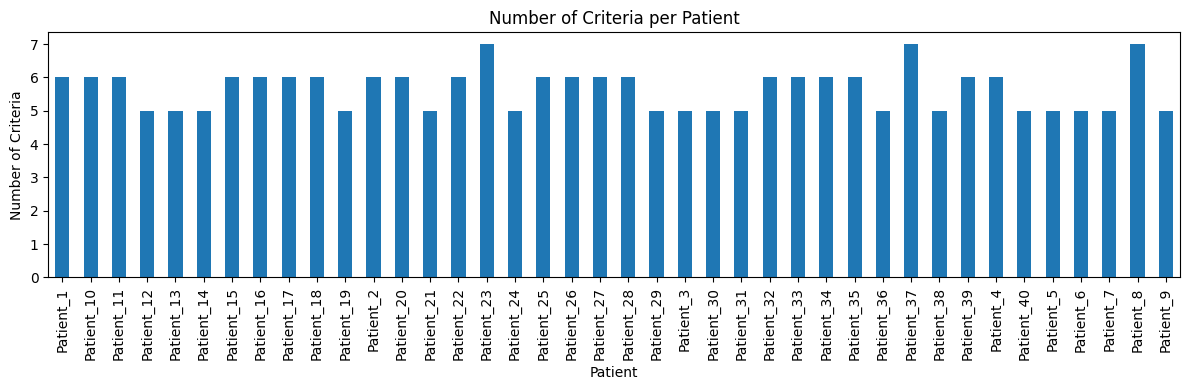

Summary statistics for number of criteria per patient:


count    40.000000
mean      5.650000
std       0.622237
min       5.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       7.000000
dtype: float64

In [5]:
criteria_counts = full_df.groupby("Patient").size()

criteria_counts.plot(kind='bar', figsize=(12, 4), title="Number of Criteria per Patient")
plt.xlabel("Patient")
plt.ylabel("Number of Criteria")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Summary statistics for number of criteria per patient:")
criteria_counts.describe()


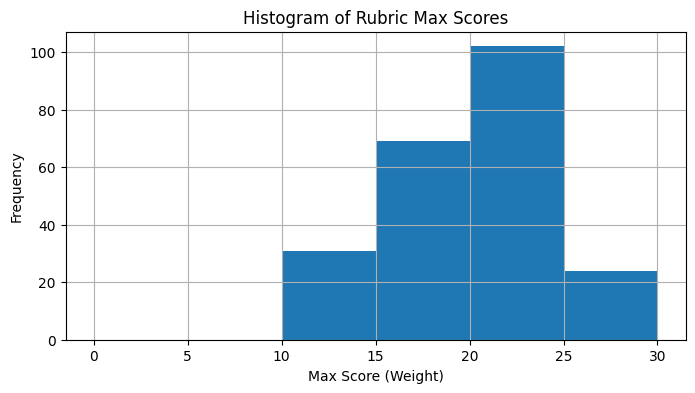

count    226.000000
mean      17.699115
std        4.448990
min       10.000000
25%       15.000000
50%       20.000000
75%       20.000000
max       30.000000
Name: Max Score, dtype: float64

In [6]:
plt.figure(figsize=(8, 4))
full_df["Max Score"].hist(bins=range(0, int(full_df["Max Score"].max()) + 5, 5))
plt.title("Histogram of Rubric Max Scores")
plt.xlabel("Max Score (Weight)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

full_df["Max Score"].describe()


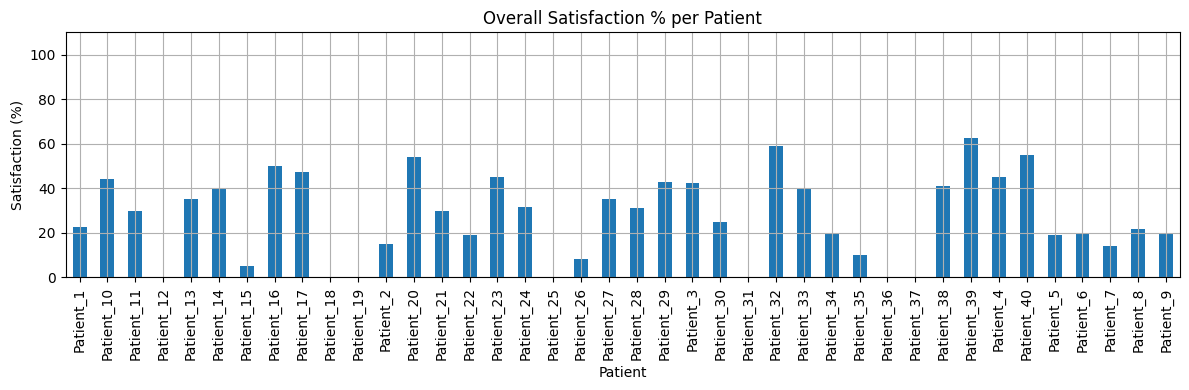

count    40.000000
mean     27.018750
std      18.779454
min       0.000000
25%      13.000000
50%      27.500000
75%      42.625000
max      62.500000
Name: Satisfaction %, dtype: float64

In [9]:
# Compute total awarded score and total max score per patient
case_scores = (
    full_df.groupby("Patient")
    .agg({"Score Awarded": "sum", "Max Score": "sum"})
    .rename(columns={"Score Awarded": "Total Score", "Max Score": "Total Max Score"})
)

# Compute satisfaction %
case_scores["Satisfaction %"] = 100 * case_scores["Total Score"] / case_scores["Total Max Score"]

# Plot
case_scores["Satisfaction %"].plot(kind='bar', figsize=(12, 4), title="Overall Satisfaction % per Patient", ylim=(0, 110))
plt.ylabel("Satisfaction (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary statistics
case_scores["Satisfaction %"].describe()


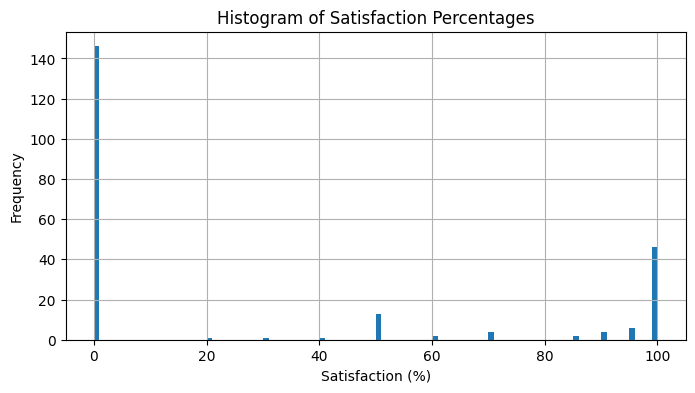

count    226.000000
mean      30.265487
std       43.008220
min        0.000000
25%        0.000000
50%        0.000000
75%       85.000000
max      100.000000
Name: Satisfaction (%), dtype: float64

In [10]:
plt.figure(figsize=(8, 4))
full_df["Satisfaction (%)"].hist(bins=100)
plt.title("Histogram of Satisfaction Percentages")
plt.xlabel("Satisfaction (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

full_df["Satisfaction (%)"].describe()


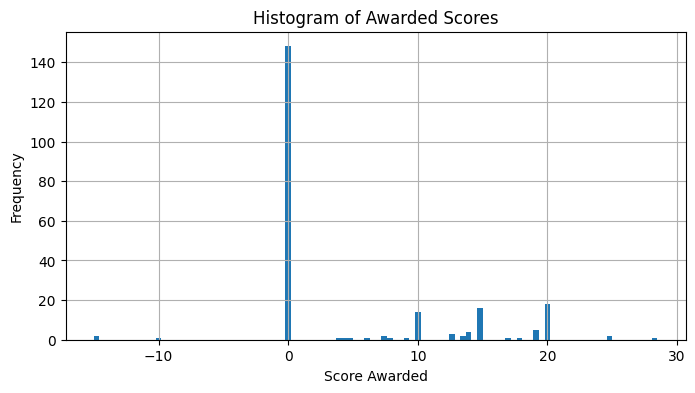

Mean score awarded: 4.78


count    226.00000
mean       4.78208
std        7.89946
min      -15.00000
25%        0.00000
50%        0.00000
75%       10.00000
max       28.50000
Name: Score Awarded, dtype: float64

In [12]:
plt.figure(figsize=(8, 4))
full_df["Score Awarded"].hist(bins=100)
plt.title("Histogram of Awarded Scores")
plt.xlabel("Score Awarded")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Mean score awarded:", round(full_df["Score Awarded"].mean(), 2))
full_df["Score Awarded"].describe()


In [5]:
output_csv = base_dir / "combined_eval_reports_outputs_4o.csv"
full_df.to_csv(output_csv, index=False)
print(f"Saved combined report to {output_csv}")

Saved combined report to /Users/aaryanshah/canvas-hyperscribe/evaluations/cases/synthetic_unit_cases/med_management_v2/combined_eval_reports_outputs_4o.csv
